In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import utils

In [3]:
result_path = "data/gerstner/results.csv"
data_set = 'train500_val100_test50'
process_variance = 1e-4
path = "data/gerstner/plots/"
savefig_name = data_set+"_full"




result_ekf = utils.get_min_loss(result_path, "measurement_variance", dict_filter={}, additional_info="full", estimator_name="Extended", n_features=1, process_variance=process_variance, data_set=data_set)

result_knet = utils.get_min_loss(result_path, "measurement_variance", dict_filter={},additional_info="full", estimator_name="KalmanNet", n_features=1, process_variance=process_variance, data_set=data_set)

# result_mismatch_ekf = utils.get_min_loss(result_path, "measurement_variance", additional_info="j=2", estimator_name="Extended", n_features=1, process_variance=process_variance, data_set=data_set)
# result_mismatch_knet = utils.get_min_loss(result_path, "measurement_variance", additional_info="j=2", estimator_name="KalmanNet", n_features=1, process_variance=process_variance, data_set=data_set)


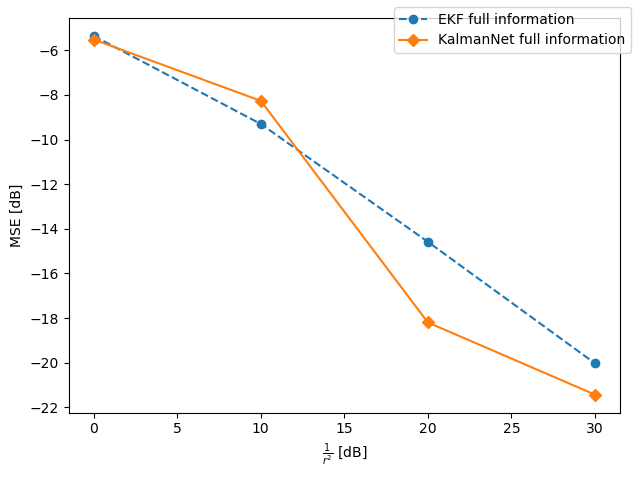

In [4]:
fig, ax = plt.subplots()
t = result_ekf["measurement_variance"]
t =t.apply(lambda x: 10*math.log10(1/x))


ax.plot(t, result_ekf["loss_in_dB"], '--o', label="EKF full information")
ax.plot(t, result_knet["loss_in_dB"], '-D',  label="KalmanNet full information")
# ax.plot(t, result_mismatch_ekf["loss_in_dB"], '--o', label = "EKF model mismatch")
# ax.plot(t, result_mismatch_knet["loss_in_dB"], '-D', label = "KalmanNet model mismatch")
fig.legend()
ax.set_ylabel("MSE [dB]")
ax.set_xlabel(r'$\frac{1}{r^2}$ [dB]')
plt.tight_layout()
plt.savefig(path+savefig_name)